## Prediction using Unsupervised ML- KMean Clustering

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Author - Sujeet Kumar Pandit

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [143]:
#Importing the dataset
data = pd.read_csv(r"data/iris.csv")
print('Shape of the dataset:', data.shape)

Shape of the dataset: (150, 6)


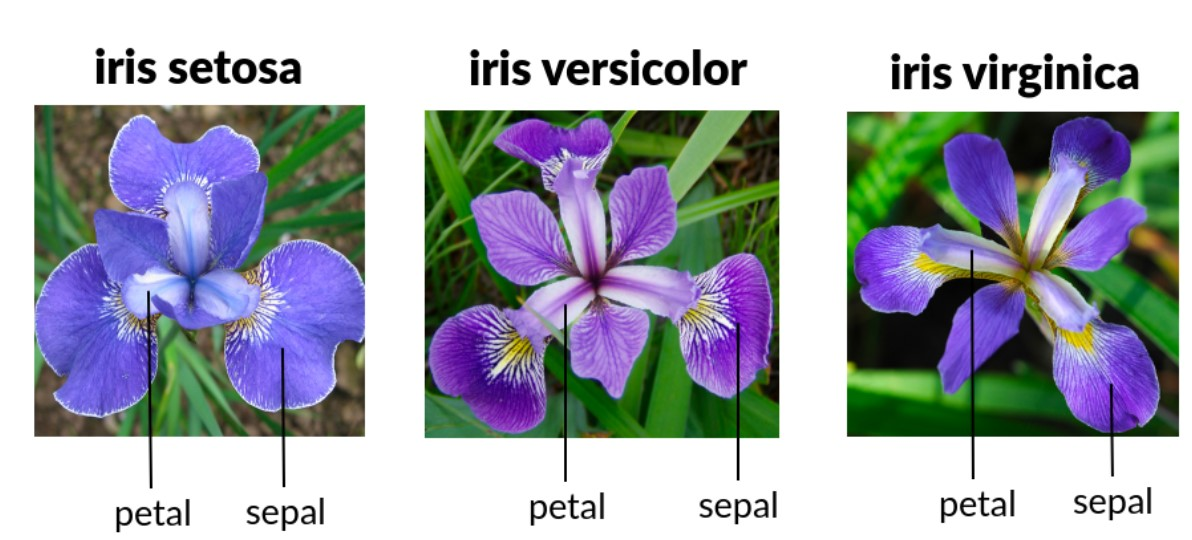

**Observation**
- The dataset contains **150** rows and **6** columns. 

This study we try to clustering Iris Dataset used KMeans

**Attribute Information:-**

Sepal length in cm <br>
Sepal width in cm <br>
Petal length in cm <br>
Petal width in cm <br>
Class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

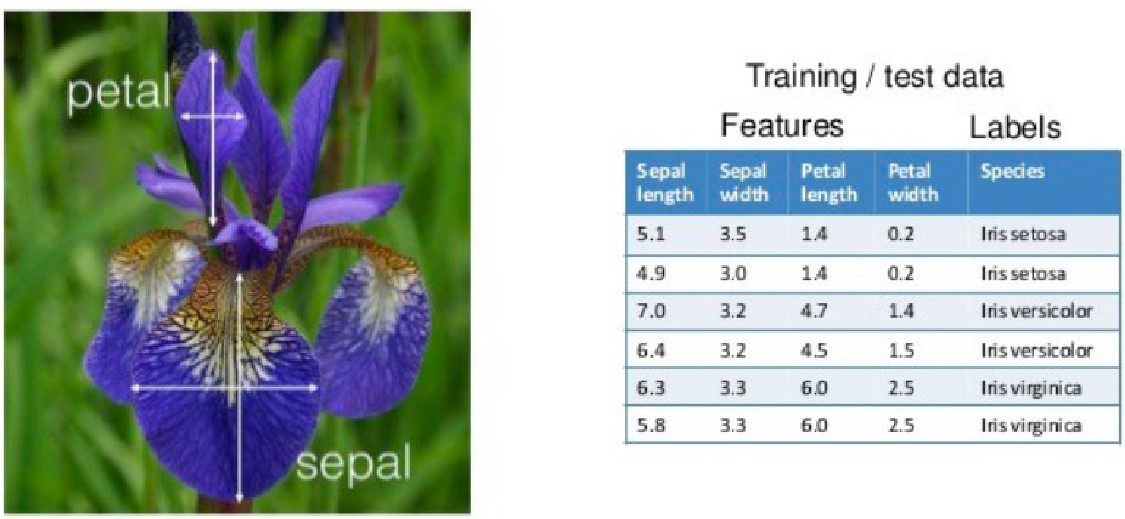

### Data Information

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Observation:**

- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

In [144]:
data = data.drop(['Id'], axis=True)  #drop the Id feature 

In [145]:
x = data.iloc[:, [0, 1, 2, 3]].values  #splitting the x feature for further evaluation

### Exploratory Data Analysis

In [146]:
#Frequency distribution of Species
iris_outcome = data["Species"].value_counts()
iris_outcome

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

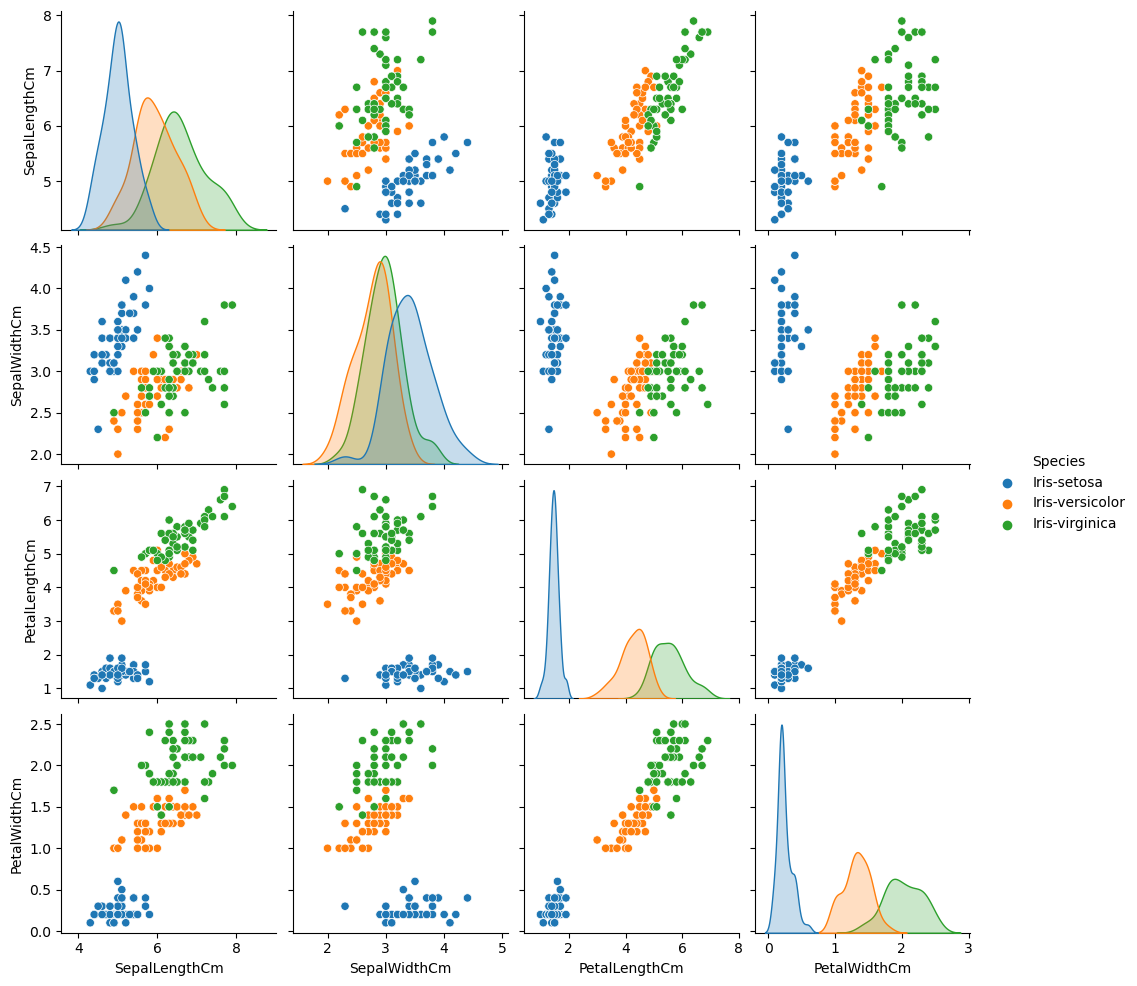

In [147]:
# Pair plot
sns.pairplot(data,hue='Species')

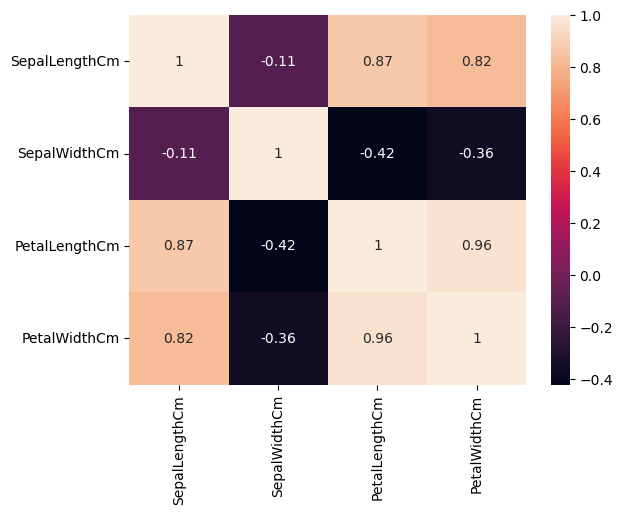

In [148]:
#Correlation Plot
sns.heatmap(data.corr(), annot=True );

**Observation:-** <br>
A **strong correlation** is present between PetalWidth and PetalLength. 

## Model Development & Evaluation

## KMean Clustering
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

### Using the elbow method to determine the optimal number of clusters for k-means clustering

- We will **iterate** our **model** over some iterations, **finding optimal K** value (number of clusters) for clustering.

- We check inertia, defined as the **mean squared distance** between each instance and its closest centroid. 

- Logically, as per the definition **lower the inertia better the model**.

In [149]:
from sklearn.cluster import KMeans

inertia_vals = []

K_vals = [i for i in range(1, 11)]

for i in K_vals:
    kmeans = KMeans(n_clusters=i, init = 'k-means++', n_init = 10, max_iter=300, random_state=0)
    kmeans.fit(x)
    inertia_vals.append(kmeans.inertia_)

In [150]:
# Visualzing the Inertia vs K Values
import plotly.graph_objs as go 

fig = go.Figure()

fig.add_trace(go.Scatter(x = K_vals, y = inertia_vals, mode = 'lines+markers'))
fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1),
                  title_text = 'The Elbow Method',
                  title_x = 0.5,
                  xaxis_title = 'Number of clusters',
                  yaxis_title = 'inertia_vals')
fig.show()

**Observations**:

- From the plot, we can see that there is a **sudden decline** in the score till $K=3$, and after that the rate of decline decreases.

- This is the point where the **elbow** is formed on the plot.

- We can use this number of clusters in our model.

- Will use  $K=3$ for better explanation of the data

## Implementing K-Means Clustering

In [151]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', n_init = 10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the Clusters

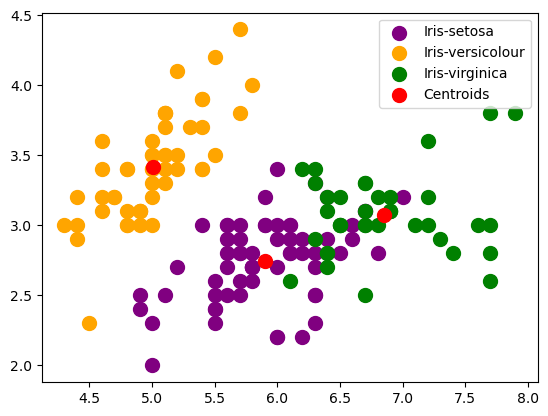

In [153]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

### 3D Scatterplot using matplotlib

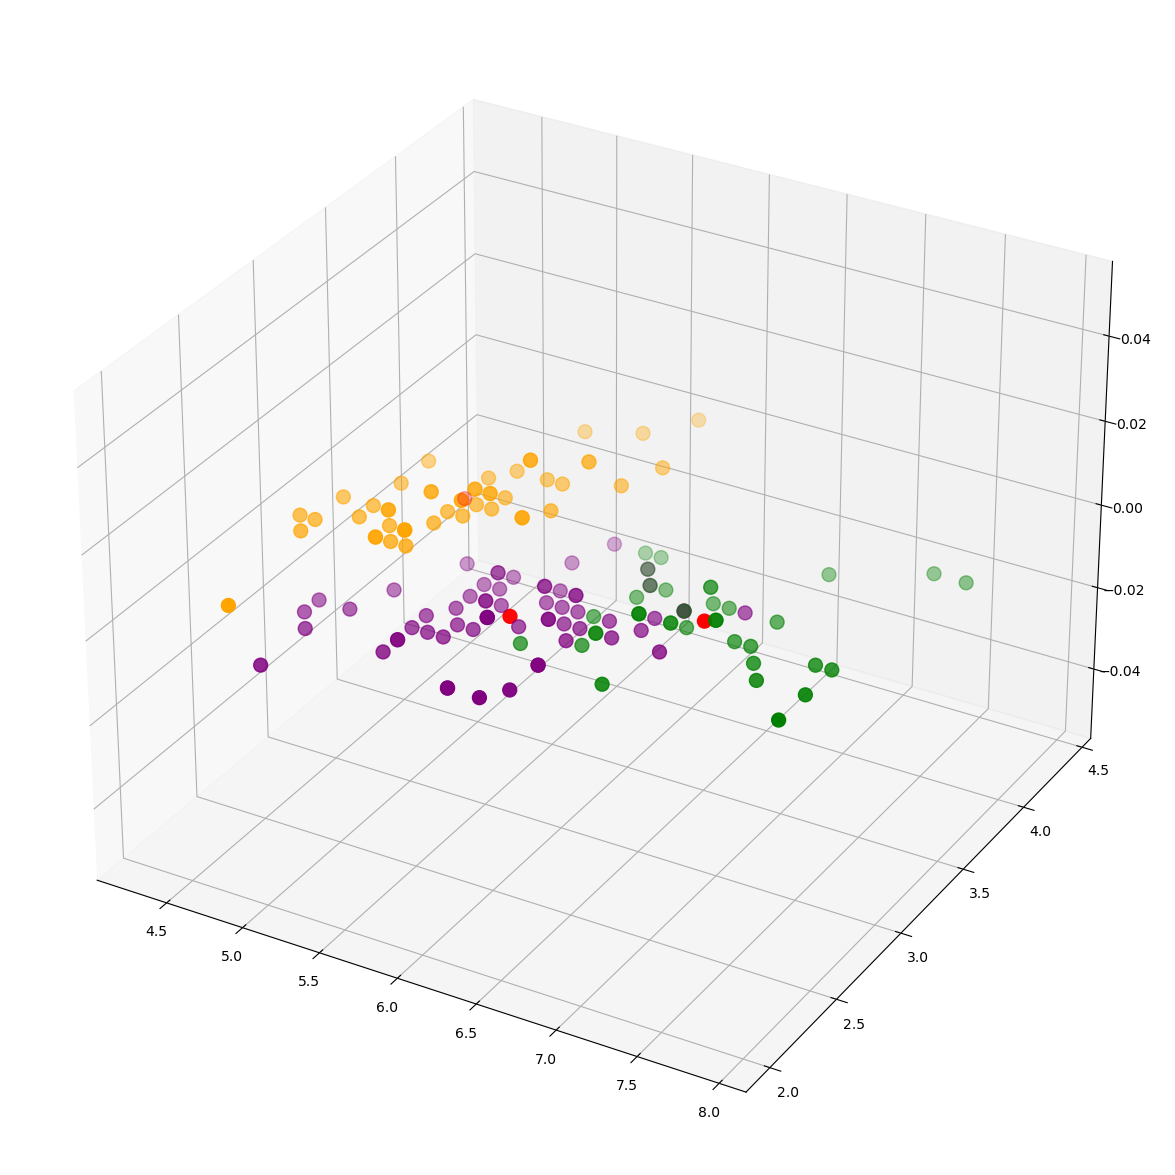

In [154]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

## Conclusion

The given dataset is balanced i.e. equal records are present for all three Species.  <br>
From the given ‘Iris’ dataset, Optimum number of clusters is $K=3$